# Olympic Data Analysis

## Introduction: 
### The Olympic Games is a well-known sporting platform which is recognized all over the world, has been distinguished from the late 19th century. Its origin however can be traced back to the Greek empire, at around 3,000 years ago, which consisted only of sprint race, and was held in Greece’s city Olympia only accessible to freeborn Greek people. It has grown since then and now has become a hub for all the athletes worldwide to demonstrate their abilities in more than 28 individual sporting contests. Currently, it is held every 2 years in different countries, with names Summer Olympics and Winter Olympics, both having their own set of games. It has become a place which reflects the power of the individual contestants and has become a source of pride for the countries they represent.

In [593]:
# First importing some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import datetime
import warnings
warnings.filterwarnings("ignore")

In [594]:
#importing olympic dataset
game_data=pd.read_csv("C:/Users/Chinmay/Downloads/olympix_data_organized_with_header (1).csv")
game_data

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1


In [595]:
#checking all unique value present in each column
game_data.nunique()

name            6955
age               42
country          110
year               7
Date_Given         7
sports            49
gold_medal         7
silver_medal       4
brone_medal        4
total_medal        7
dtype: int64

### Dataset Description:  
### This dataset contain saven years of  Summer Olympic and winter Olympic data including information player's participation from 110 diffrent country in 49 diffrent games.

# Performing basic exploration

In [596]:
# Checking dtatypes of each valriable
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


### In this dataset system reads Date_Given column's data type as object so we need to convert this to DateTimeIndex.

In [597]:
#correcting variable's datatype
game_data['Date_Given'] = pd.to_datetime(game_data['Date_Given'])

## Dealing with duplicate values to avoid bias in the study

In [598]:
# dropping duplicate datas
game_data.drop_duplicates().shape

(8615, 10)

### There is 3 duplicate data detected by system and removed.
### If we look at the name column, we can see the name column has included some special charecters and if any duplicate value will present there, system can't detect it.
### So we have to exclude name column during performing drop_duplicate operation.
### After excluding name column he have enough data to detect duplicates.

In [599]:
# Dropping duplicate values excluding name column
game_data=game_data.drop_duplicates(subset=["age","country","year","sports","gold_medal","Date_Given","silver_medal","brone_medal","total_medal"])
game_data.shape

(6957, 10)

In [600]:
game_data

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,2000-10-01,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,2000-10-01,Archery,0,0,1,1


### Successfully we removed more than 700 duplicate vaues.


In [601]:
# Checking null values by column
game_data.isnull().sum()

name            2
age             2
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

### Here we came to know that value is missing from name and age column.
### We can't determine proper information from from this dataset if candidate's name and age is missing.
### So here we need to drop this column

In [602]:
#dropping null values
game_data=game_data.dropna()

In [603]:
#checking null values again
game_data.isnull().sum()

name            0
age             0
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

## Removing special characters from name column

In [605]:
#Removing special characters applying string methode
game_data["name"]=game_data.name.str.replace('[^a-zA-Z0-9]', '')
game_data.head()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,MichaelPhelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,MichaelPhelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,MichaelPhelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,NatalieCoughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,AlekseyNemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6


### Name column contains some special characters which is completely unnecessary for our analysis so we decided to remove it.

## Performing data visualization techniques to appropriate columns 

## Finding how many athlets participated in Olympics from which country.

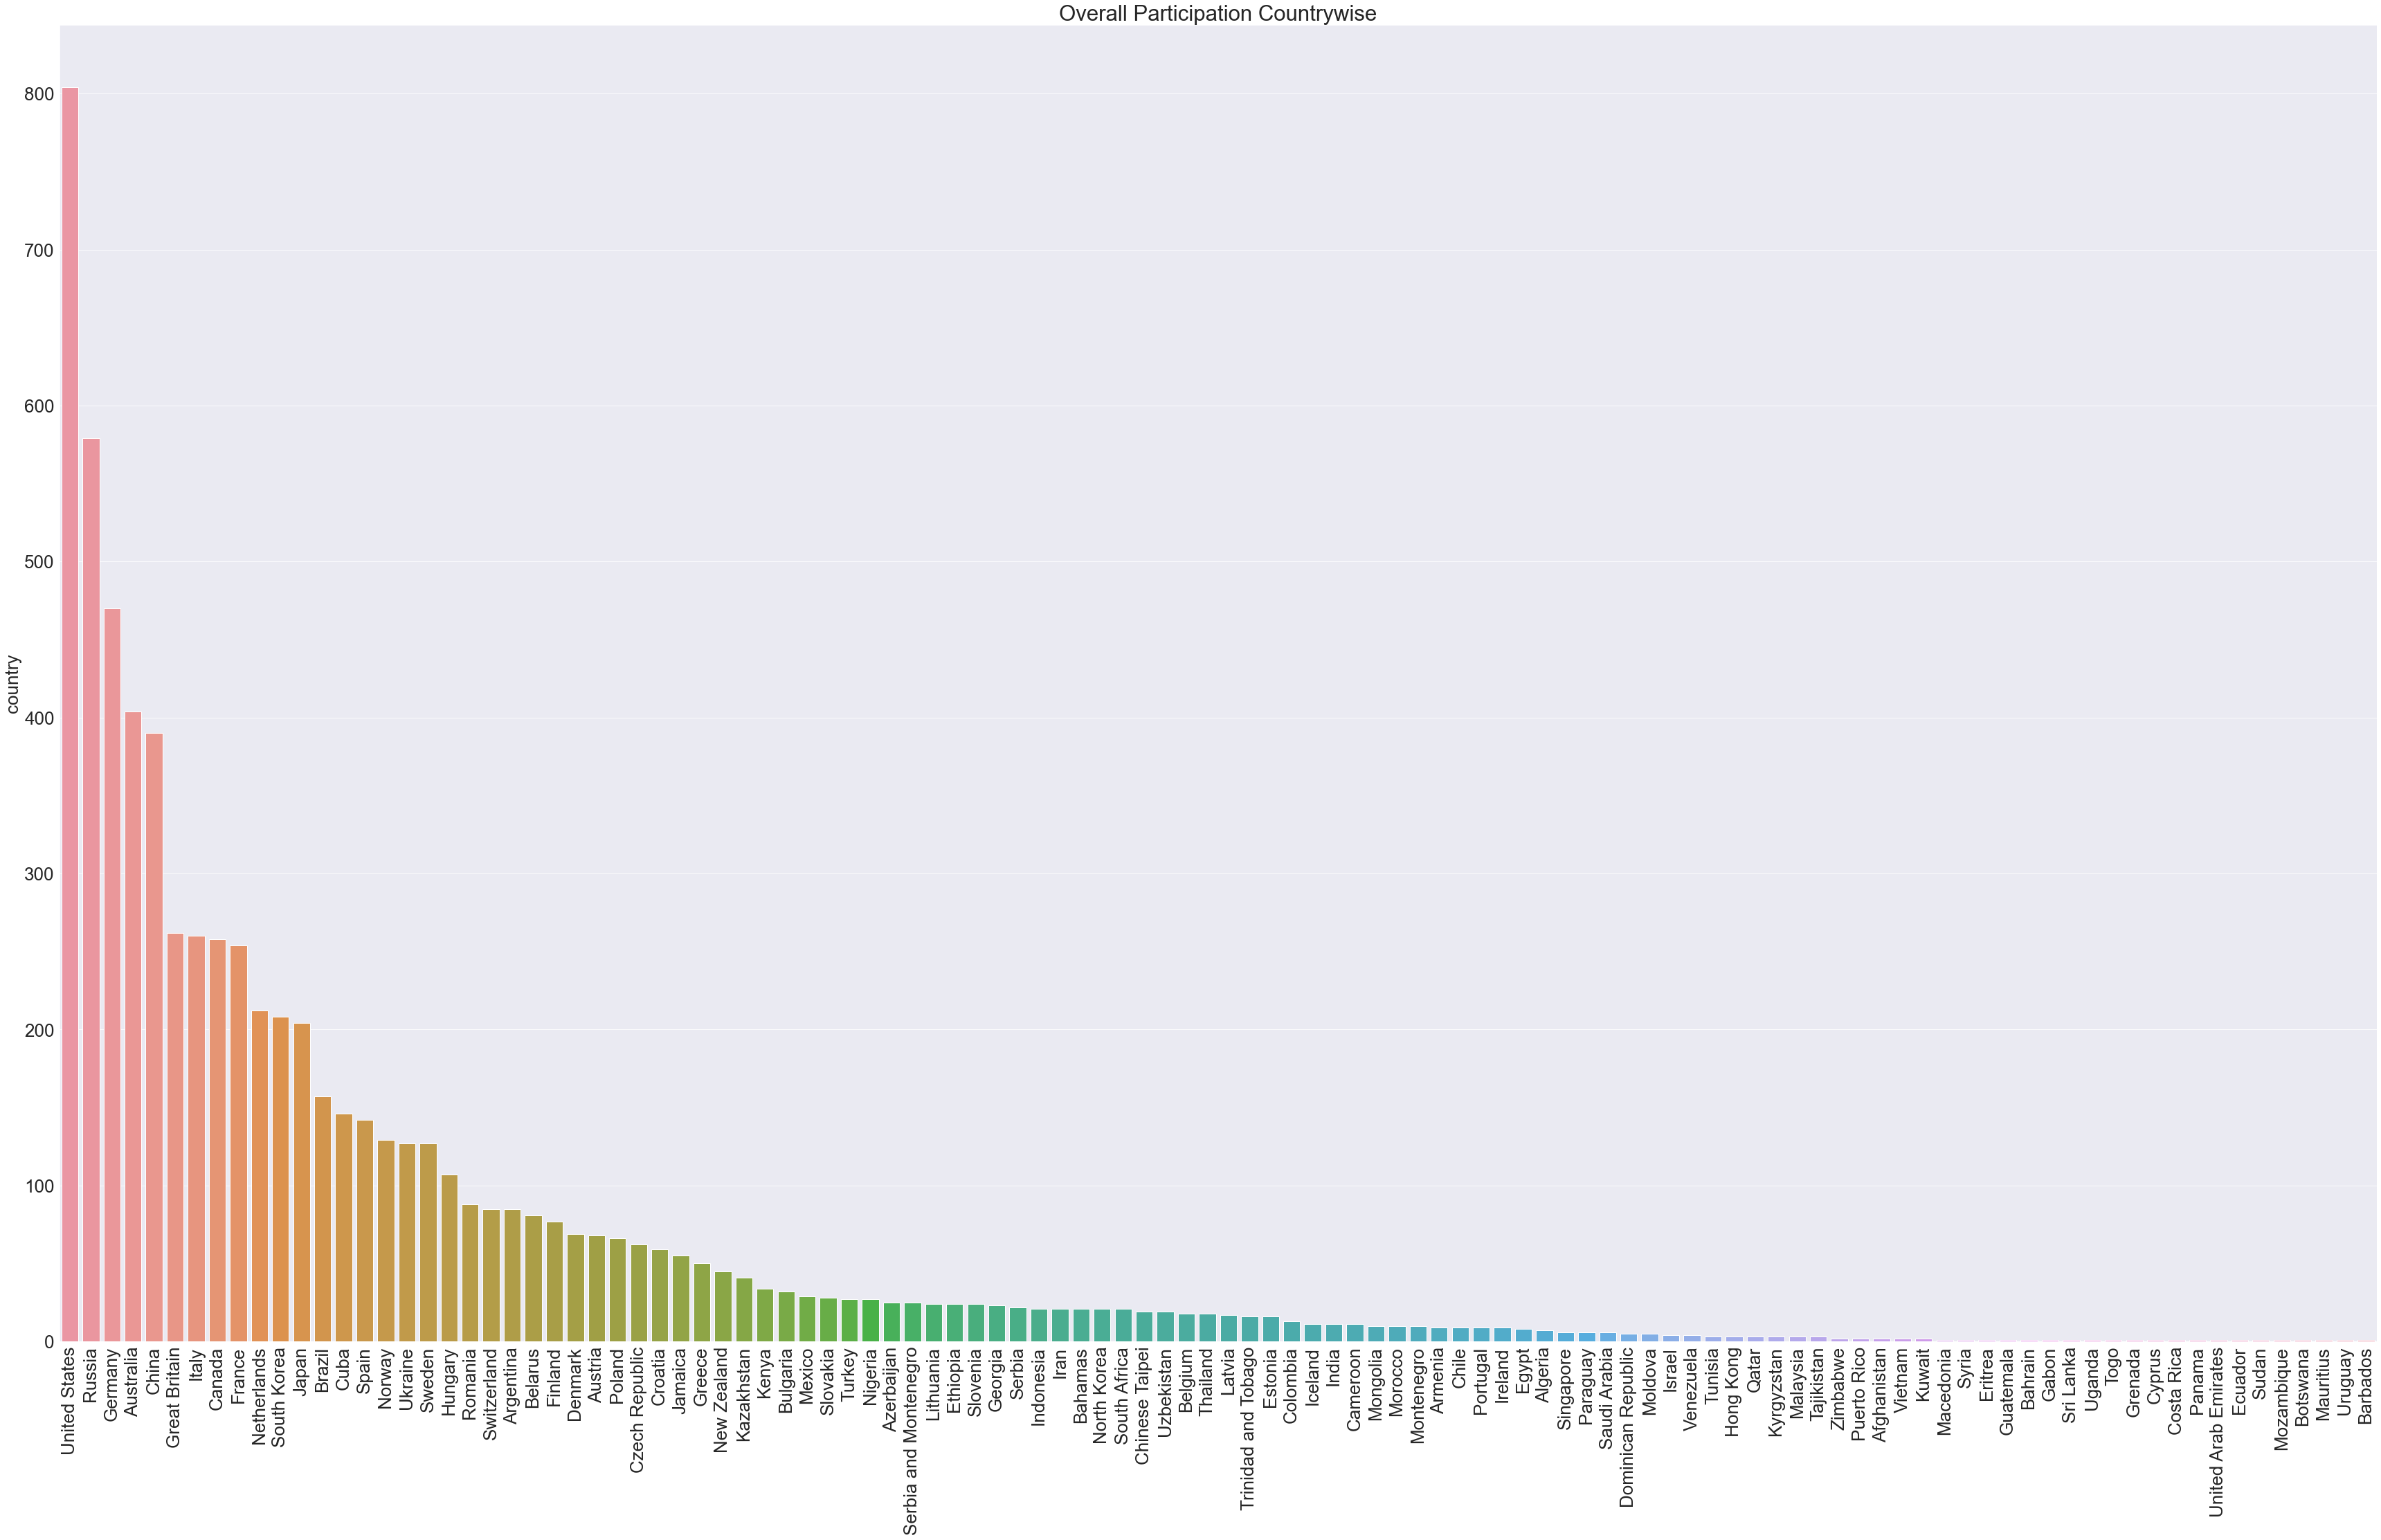

In [581]:
# creating barplot to examine the count athlets
top_countries = game_data.country.value_counts().sort_values(ascending=False)
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 26
plt.rcParams['figure.figsize'] = (30, 15)
plt.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(60,35))

plt.xticks(rotation=90)
plt.title('Overall Participation Countrywise')
sns.barplot(x=top_countries.index, y=top_countries);

### Here we can clearly see that most of the athlets participated in Olympics are from United States

## Calculating total medals by sports

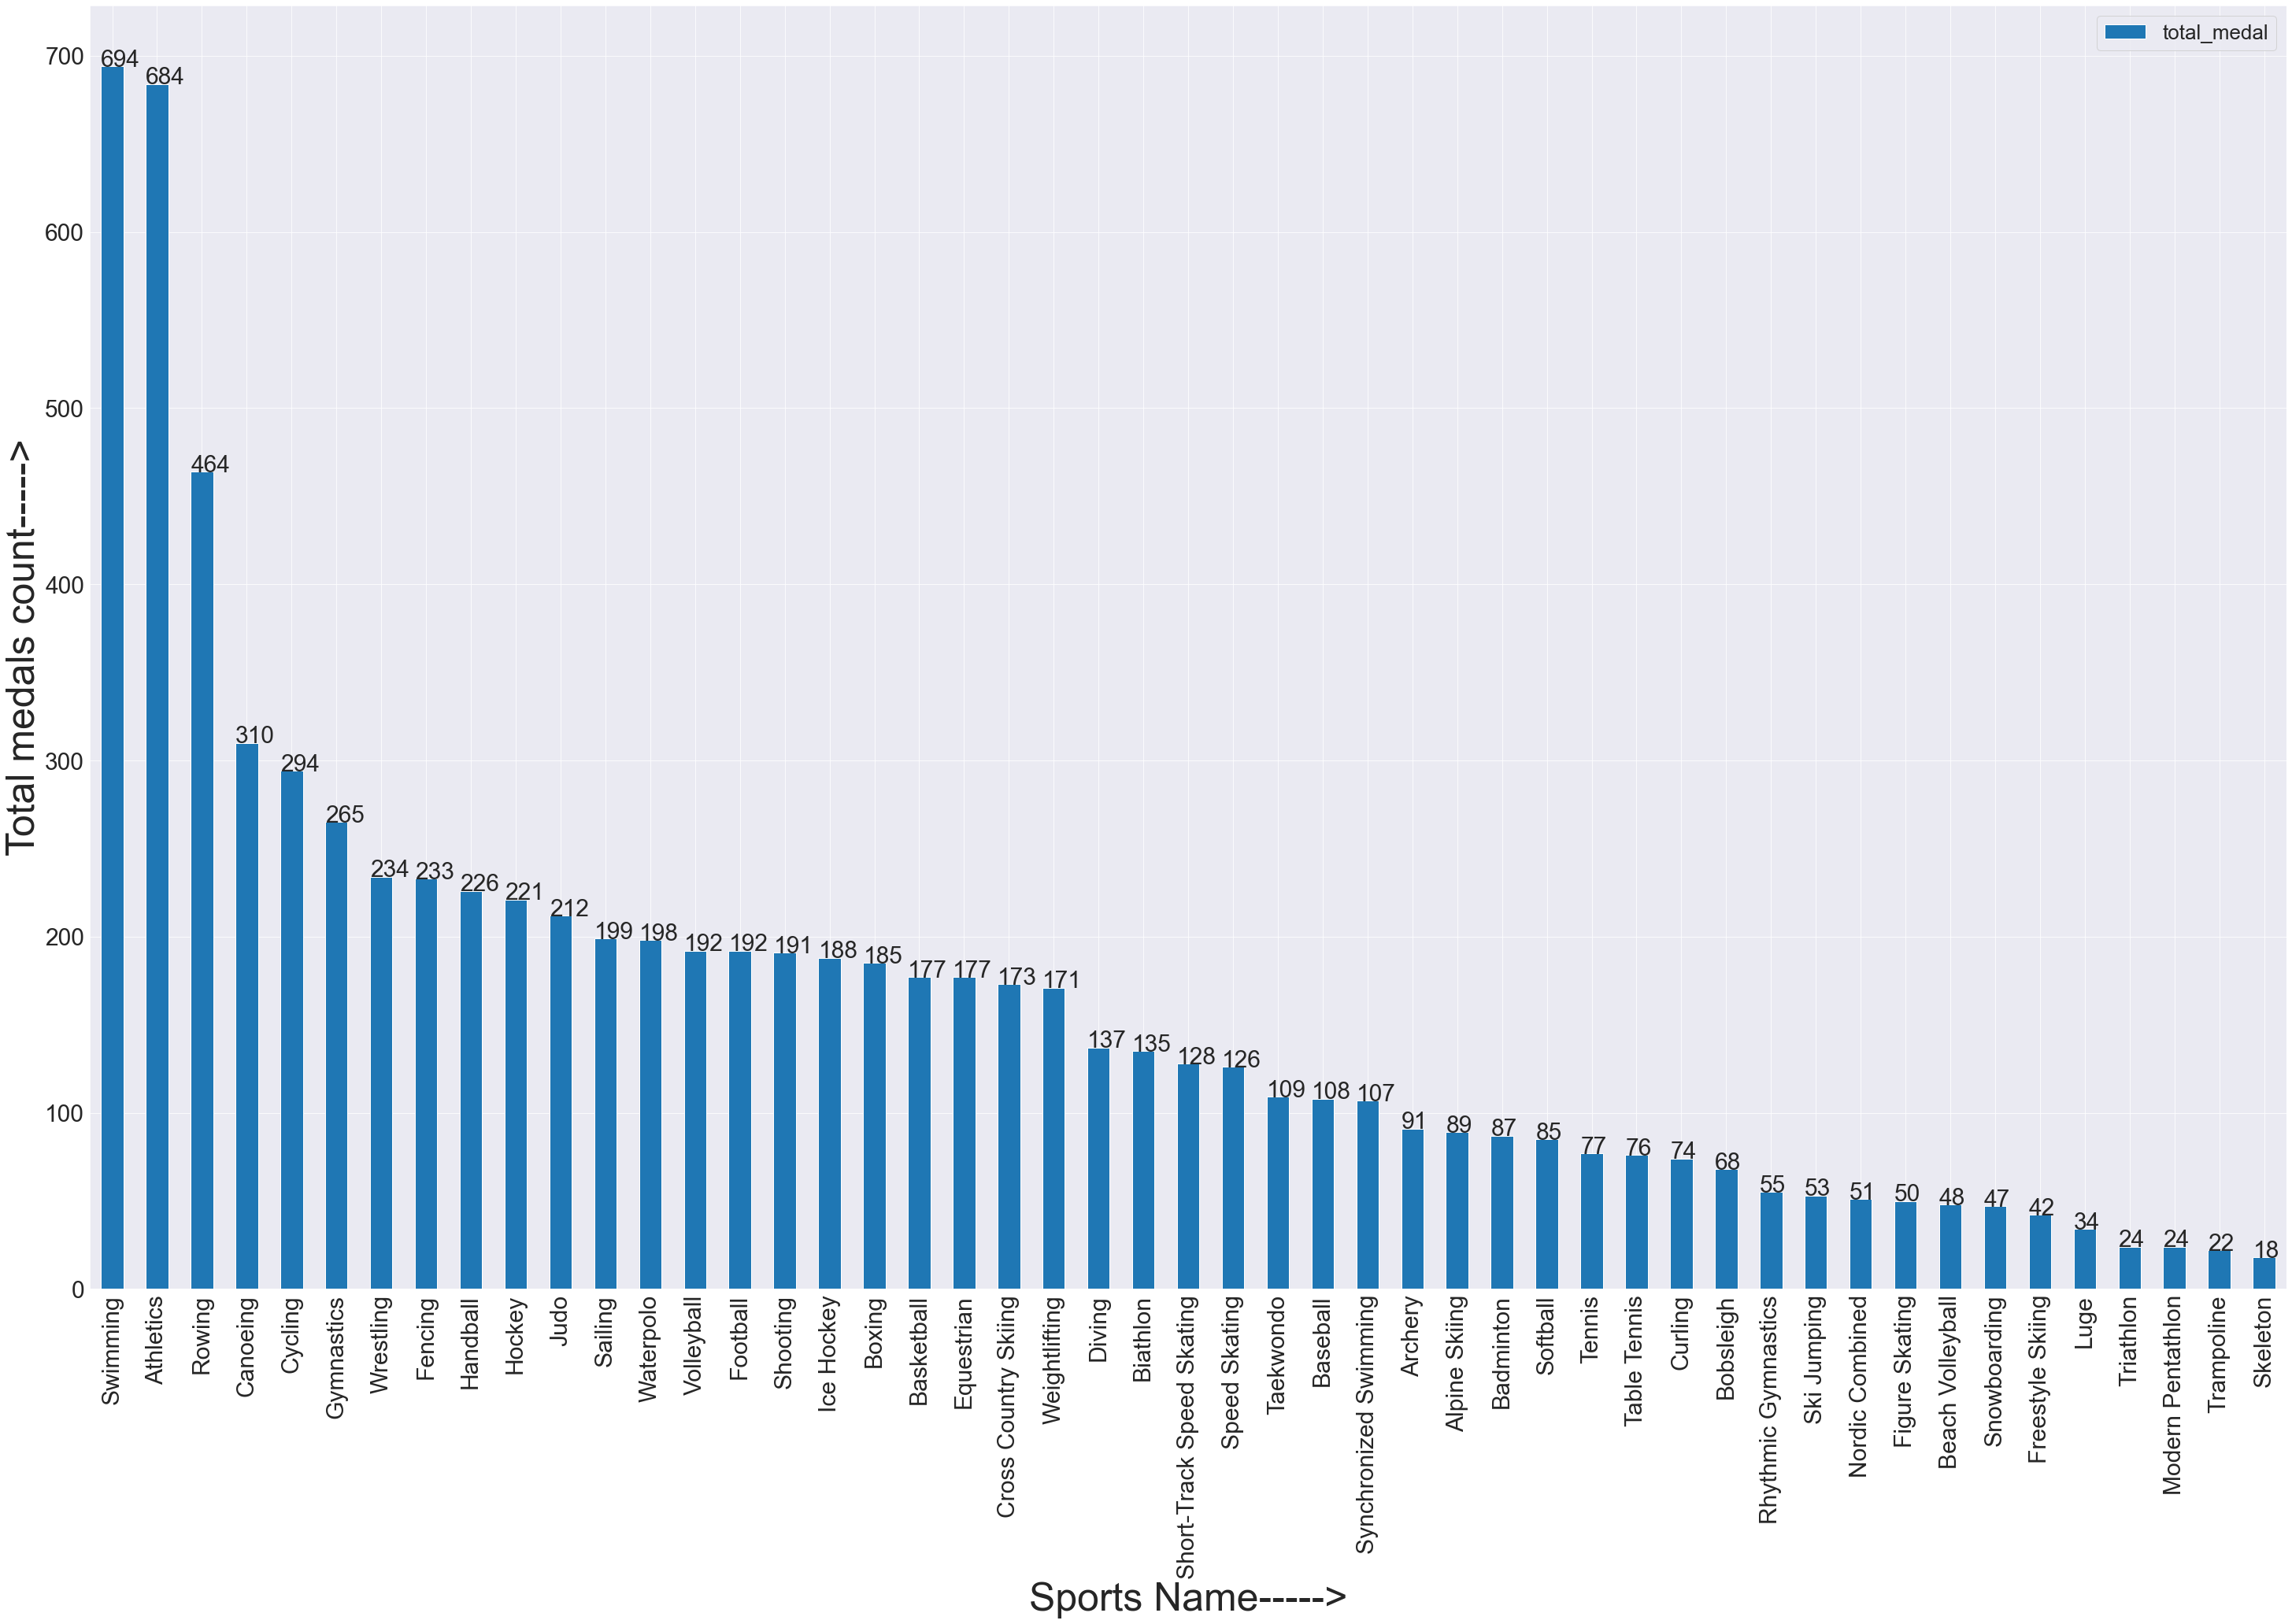

In [588]:
# grouping  total medals with sports and visualize the value using bar plot
sd=game_data[["sports", "total_medal"]].groupby(['sports'], as_index=False).sum().sort_values(by='total_medal', ascending=False) 
ax=sd.plot(x="sports", y="total_medal", kind="bar", rot=90, fontsize=30,figsize=(50,30)) # Initializing x-axis and y-axis
for p in ax.patches: #setting data lables
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()), fontsize=30)
plt.ylabel('Total medals count----->',fontsize=50) #setting axis names
plt.xlabel('Sports Name----->',fontsize=50)
plt.show()    


### From this above graph we can clealy see Swimming sports has contain heighest medals

## Calculating how much medals are won by which year

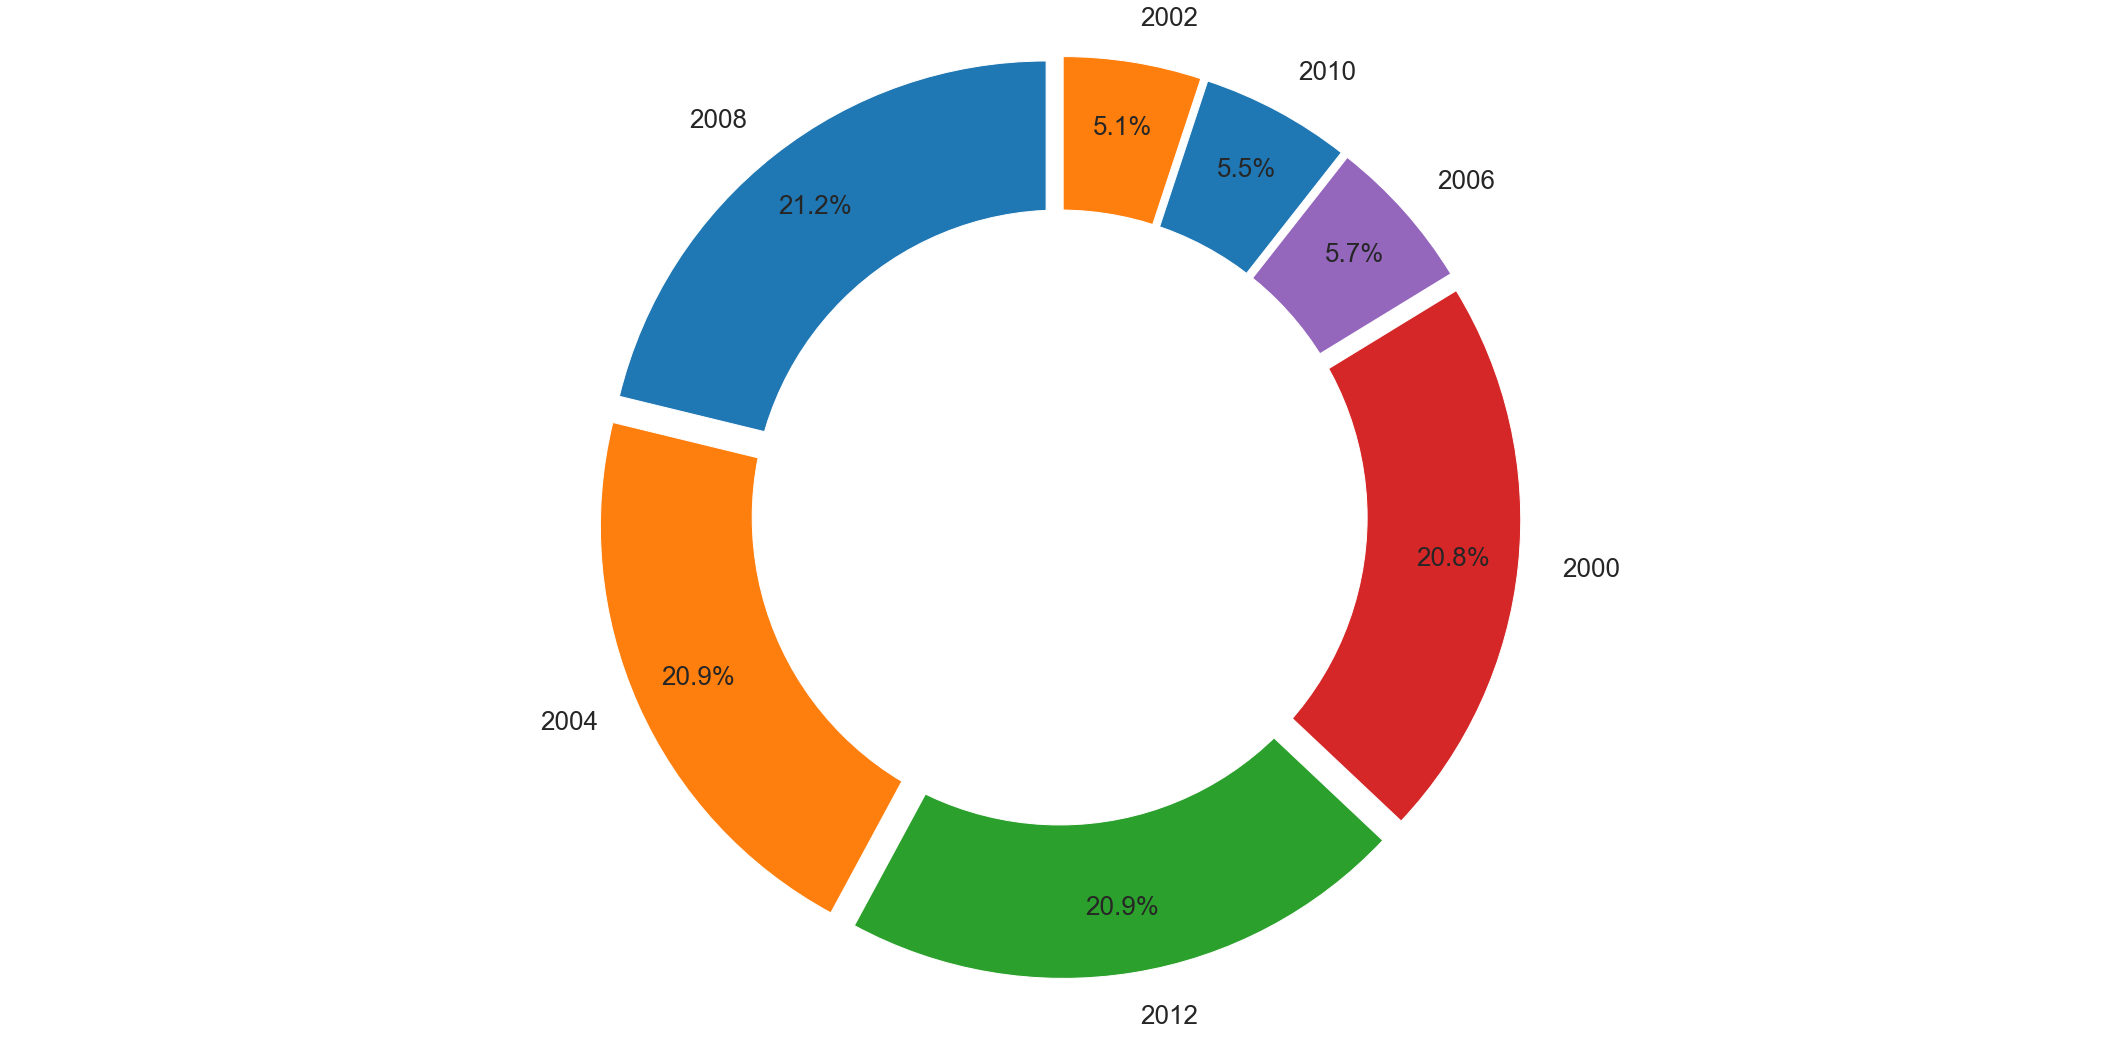

In [583]:
# groupby coutry with sum of total medals and represent value using pie plot.
Total_medals_by_year=game_data[["year","total_medal"]].groupby(["year"],as_index= False).sum().sort_values(by="total_medal",ascending =False)
fig1, ax1 = plt.subplots()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)

ax1.pie(Total_medals_by_year['total_medal'], colors = colors, labels= Total_medals_by_year['year'], autopct='%1.1f%%', startangle=90
       , pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

### From this graph we came to know that year of 2004 and 2012 has contain similar number of total medals

## Checking age column data

In [546]:
# checking age column skew value
game_data["age"].skew()

0.8565637283706867

### skew value of age column is 0.856 which is greater than 0.5, so we can consider that age column's data is modrately right skewed.

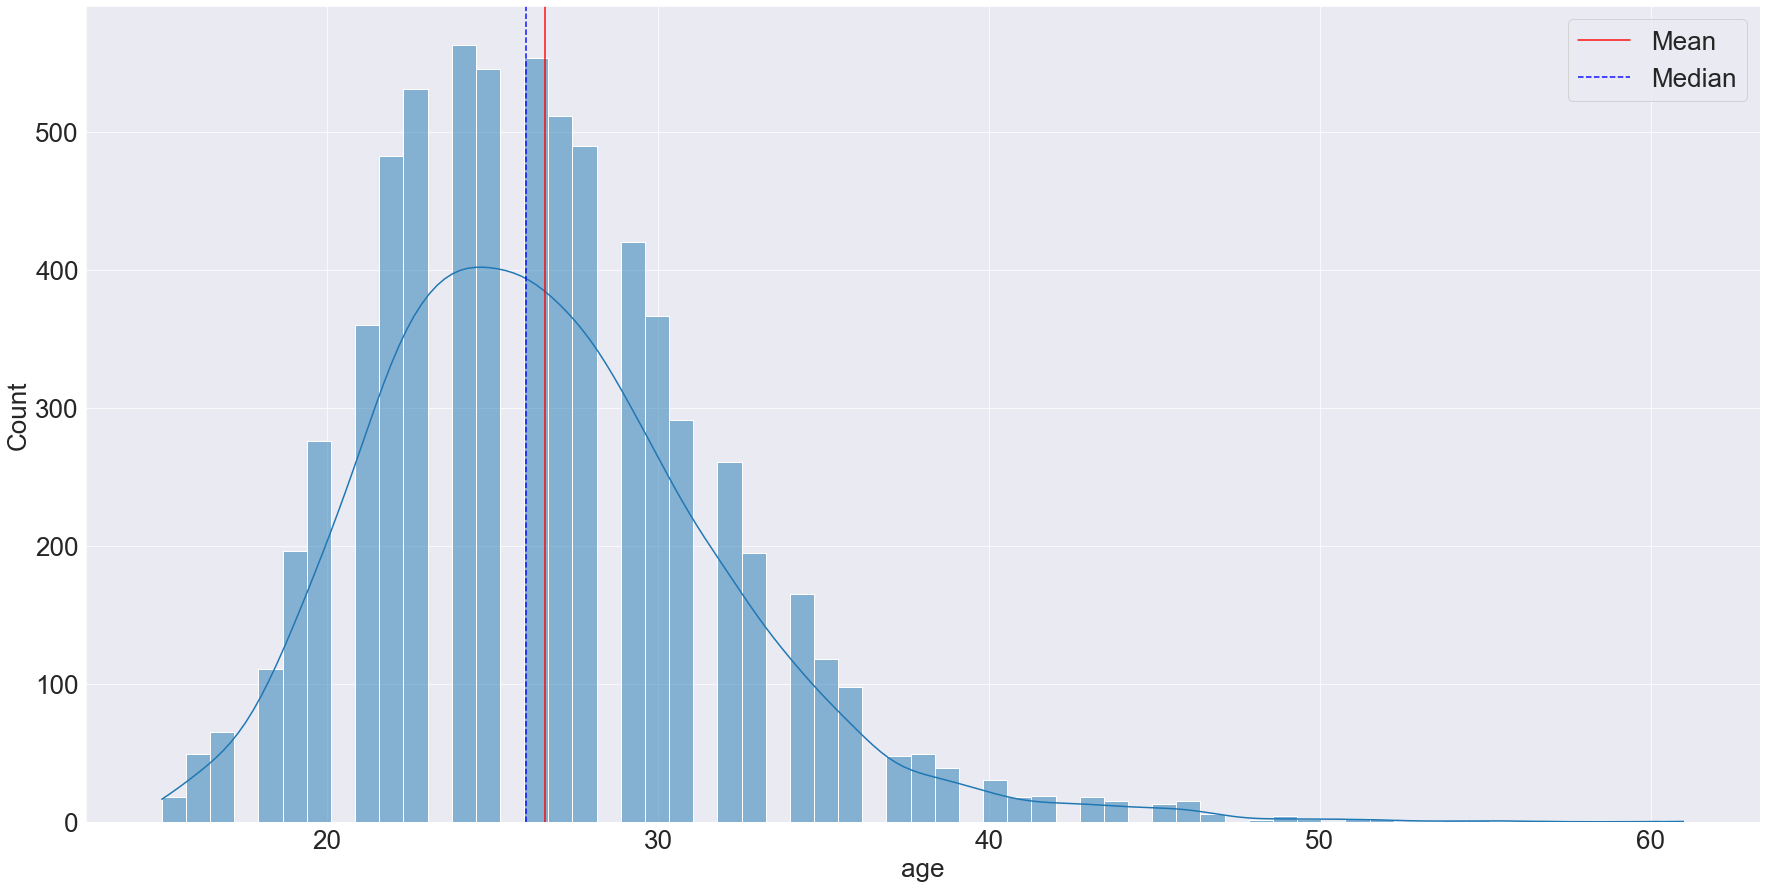

In [547]:
# creating histplot to examin skewness of age column.
sns.histplot(data= game_data["age"],kde=True)
plt.axvline(x=game_data.age.mean(),color='red',alpha=20,label='Mean')
plt.axvline(x=game_data.age.median(),c='blue',ls='--',alpha=20,label='Median')
plt.legend()

### We can clearly see that age data is slightly right skewed so we have to use transformation technique to normalize the data.

## Applying appropriate transformation technique to normalize data

In [548]:
df=game_data.copy() #creating a copy of our original dataset
df["age"] = np.log(df["age"]) #applying log transformation 

In [549]:
#checking skew value
df["age"].skew()

0.15552115395089186

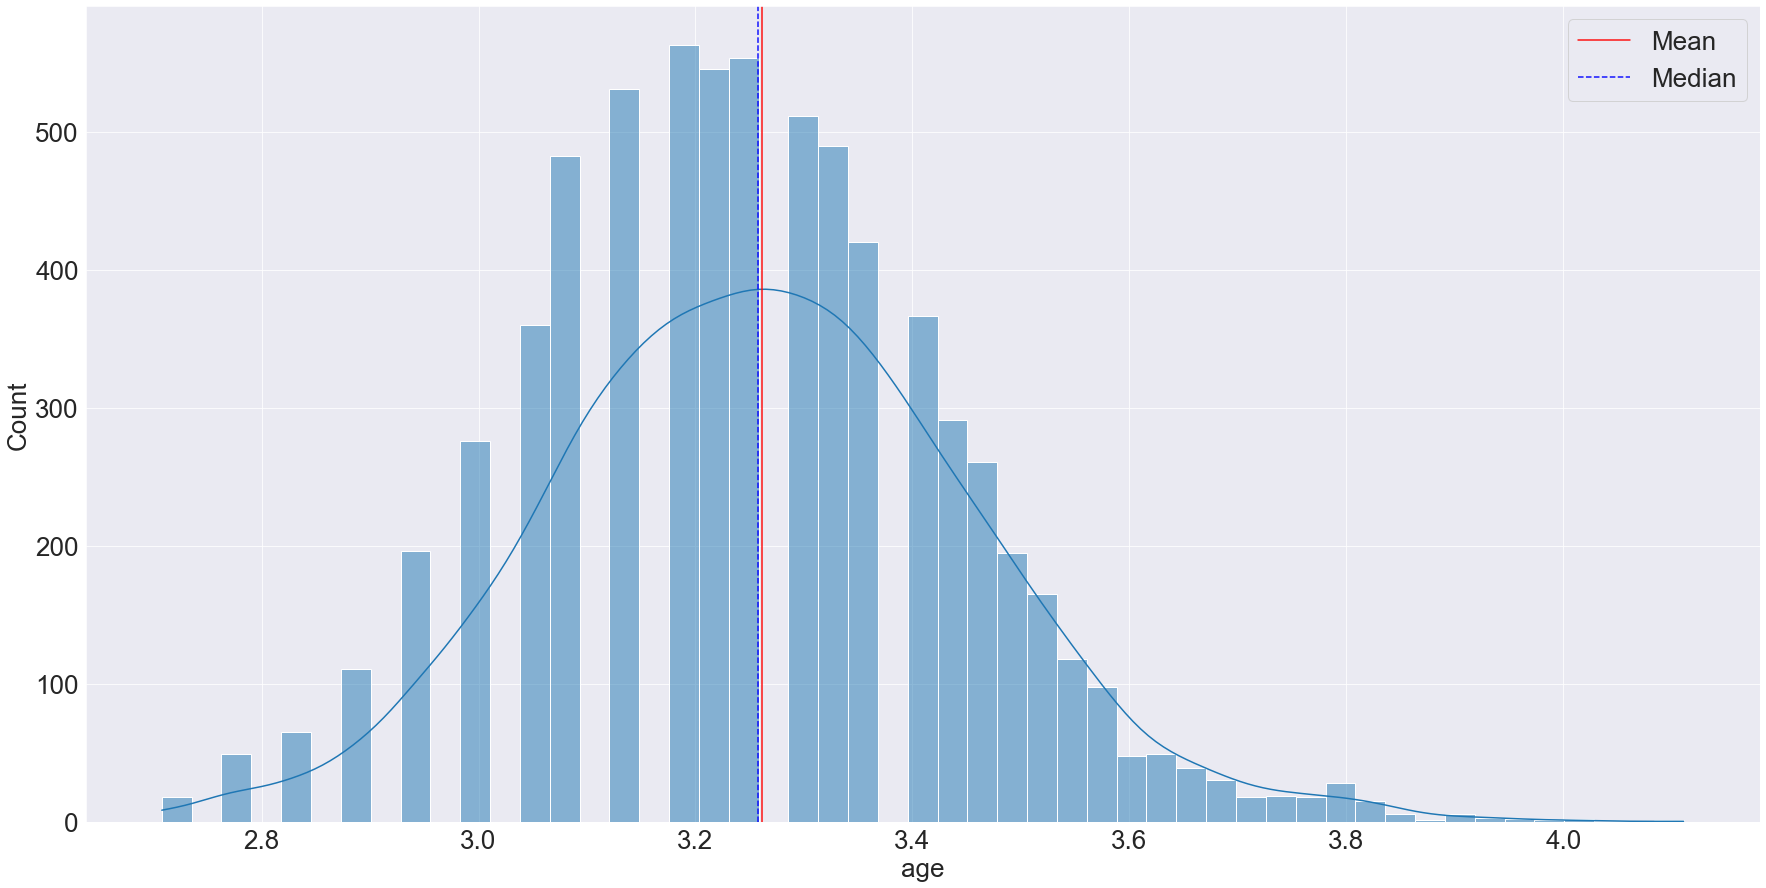

In [550]:
# creating histplot to examin skewness of transformed age column.
sns.histplot(data= df["age"],kde=True)
plt.axvline(x=df.age.mean(),color='red',alpha=20,label='Mean')
plt.axvline(x=df.age.median(),c='blue',ls='--',alpha=20,label='Median')
plt.legend()

### Now transformed age column is seems like normally distributed

##  Performing appropriate numerical measures on each column 

In [518]:
# we can perform numerial measure of each colum by using describe function
game_data.describe(include='all')

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
count,6955,6955.000000,6955,6955.000000,6955,6955,6955.000000,6955.000000,6955.000000,6955.000000
unique,5703,NaN,110,NaN,7,49,NaN,NaN,NaN,NaN
top,RobertScheidt,NaN,United States,NaN,2008-08-24 00:00:00,Athletics,NaN,NaN,NaN,NaN
freq,4,NaN,804,NaN,1492,619,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2000-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2012-08-12 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,26.583609,NaN,2006.020129,NaN,NaN,0.367937,0.370525,0.389504,1.127965
std,NaN,5.330197,NaN,4.297620,NaN,NaN,0.559059,0.519972,0.512124,0.448708
min,NaN,15.000000,NaN,2000.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
25%,NaN,23.000000,NaN,2002.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000


#### From 6955 name data 5703 unique names present in the dataset.
#### In this dataset minimum age registered is 15 and max is 61.
#### Total 110 diffrent country's data is present in the dataset.
#### There is 7 years of game data interval of 2 years.
#### First date of game according to dataset is 2000-10-01 and last date is 2012-08-12.
#### Total 49 unique sports data present in the dataset.
#### Maximum 8 gold medals,3 silver meda and 3 bronze recorded as individual records in a single year.

## listing the top 10 countries with the gold medal

In [551]:
# groupby coutry with sum of gold medals
game_data[["country","gold_medal"]].groupby(["country"],as_index= False).sum().sort_values(by="gold_medal",ascending =False).head()

,country,gold_medal
104,United States,418
18,China,207
80,Russia,195
37,Germany,186
4,Australia,143
38,Great Britain,111
16,Canada,105
34,France,94
88,South Korea,89
68,Netherlands,80


## listing the top 10 countries with the silver medal

In [553]:
# groupby coutry with sum of silver medals
game_data[["country","silver_medal"]].groupby(["country"],as_index= False).sum().sort_values(by="silver_medal",ascending =False).head(10)

,country,silver_medal
104,United States,315
80,Russia,187
4,Australia,177
37,Germany,173
18,China,135
68,Netherlands,99
34,France,94
38,Great Britain,92
52,Japan,90
50,Italy,87


## listing the top 10 countries with the bronze medal

In [554]:
# groupby coutry with sum of broze medals
game_data[["country","brone_medal"]].groupby(["country"],as_index= False).sum().sort_values(by="brone_medal",ascending =False).head(10)

,country,brone_medal
104,United States,266
80,Russia,257
37,Germany,187
4,Australia,169
18,China,124
50,Italy,117
34,France,95
52,Japan,89
16,Canada,86
38,Great Britain,85


## listing the top 10 countries with the total medal

In [522]:
# groupby coutry with sum of total medals
game_data[["country","total_medal"]].groupby(["country"],as_index= False).sum().sort_values(by="total_medal",ascending =False).head()

,country,total_medal
104,United States,999
80,Russia,639
37,Germany,546
4,Australia,489
18,China,466


In [589]:
# creating a copy of cleaned dataset
df=game_data.copy

In [371]:
# Saving cleaned dataset into system
df.to_csv(r'C:/Users/Chinmay/Downloads/Untitled9.csv', index = False)